In [326]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_A = pd.read_excel(r"C:\Users\LW832PA\Downloads\PRO_VendorPaymentAnalaysisV2.xlsx")

In [4]:
df_B = pd.read_excel(r"C:\Users\LW832PA\Downloads\PRI_VendorPaymentAnalysisV2.xlsx")

In [5]:
df_n = pd.concat([df_A,df_B],axis =0)

In [6]:
df_A.columns

Index(['Vendor Number', 'Vendor Name', 'Document Number', 'SOURCE_SYSTEM_ID',
       'Company Code', 'Fiscal Year', 'Due Date', 'Clearing Date',
       'Cash Discount Days 1', 'Cash Discount Days 2',
       'Net Payment Terms Period', 'Payment Method', 'Posting Key',
       'Document Date', 'Posting Date', 'Document Entered date',
       'Date of the Last Document Change by Transaction',
       'Date of the Last Document Update', 'Amount', 'Payment Status',
       'Document Count'],
      dtype='object')

In [7]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194177 entries, 0 to 605535
Data columns (total 21 columns):
 #   Column                                           Non-Null Count    Dtype         
---  ------                                           --------------    -----         
 0   Vendor Number                                    1194067 non-null  float64       
 1   Vendor Name                                      1194067 non-null  object        
 2   Document Number                                  1194068 non-null  float64       
 3   SOURCE_SYSTEM_ID                                 1194177 non-null  object        
 4   Company Code                                     1194177 non-null  object        
 5   Fiscal Year                                      1194177 non-null  int64         
 6   Due Date                                         1188547 non-null  object        
 7   Clearing Date                                    1194068 non-null  float64       
 8   Cash Discount

In [8]:
df_n.isnull().sum()

Vendor Number                                         110
Vendor Name                                           110
Document Number                                       109
SOURCE_SYSTEM_ID                                        0
Company Code                                            0
Fiscal Year                                             0
Due Date                                             5630
Clearing Date                                         109
Cash Discount Days 1                                  109
Cash Discount Days 2                                  109
Net Payment Terms Period                              109
Payment Method                                     849929
Posting Key                                           109
Document Date                                         109
Posting Date                                          109
Document Entered date                                 109
Date of the Last Document Change by Transaction       109
Date of the La

In [9]:
df_n.shape

(1194177, 21)

In [10]:
df_n['Payment Method'].value_counts()

V    93636
I    52911
-    44504
D    38527
8    27880
6    16784
W    13119
E    11887
+     9632
1     6211
G     6004
L     4518
T     2643
$     2406
F     2370
ß     1857
4     1405
R     1048
N     1000
B      852
M      840
5      692
X      674
H      673
A      350
3      346
{      324
Y      282
9      264
(      239
C      133
J      116
P       77
S       23
U       10
Z        6
<        3
'        1
7        1
Name: Payment Method, dtype: int64

In [11]:
df_n.drop('Payment Method',axis=1, inplace= True )

In [12]:
df_n.dropna(subset = ['Vendor Number'], inplace = True)

In [13]:
df_n.dropna(subset = ['Due Date'], inplace = True)

In [14]:
df_n.isnull().sum()

Vendor Number                                          0
Vendor Name                                            0
Document Number                                        0
SOURCE_SYSTEM_ID                                       0
Company Code                                           0
Fiscal Year                                            0
Due Date                                               0
Clearing Date                                          0
Cash Discount Days 1                                   0
Cash Discount Days 2                                   0
Net Payment Terms Period                               0
Posting Key                                            0
Document Date                                          0
Posting Date                                           0
Document Entered date                                  0
Date of the Last Document Change by Transaction        0
Date of the Last Document Update                       0
Amount                         

In [15]:
df_n['Payment Status'].value_counts()

On-Time Payment    891561
Late Payment       225730
Early Payment       35956
Name: Payment Status, dtype: int64

In [16]:
df_n['Payment Status'] = np.where(df_n['Payment Status'].isnull(),'On-Time Payment',df_n['Payment Status'])

In [17]:
df_n.isnull().sum()

Vendor Number                                      0
Vendor Name                                        0
Document Number                                    0
SOURCE_SYSTEM_ID                                   0
Company Code                                       0
Fiscal Year                                        0
Due Date                                           0
Clearing Date                                      0
Cash Discount Days 1                               0
Cash Discount Days 2                               0
Net Payment Terms Period                           0
Posting Key                                        0
Document Date                                      0
Posting Date                                       0
Document Entered date                              0
Date of the Last Document Change by Transaction    0
Date of the Last Document Update                   0
Amount                                             0
Payment Status                                

In [18]:
df_n[df_n['Clearing Date']==0].shape

(35299, 20)

In [19]:
df_n.drop(df_n[df_n['Clearing Date'] == 0].index, inplace = True)

In [20]:
df_n[df_n['Due Date']==0].shape

(0, 20)

In [21]:
df_n[df_n['Document Date']==0].shape

(0, 20)

In [22]:
df_n[df_n['Posting Date']==0].shape

(0, 20)

In [23]:
df_n[df_n['Document Entered date']==0].shape

(0, 20)

In [24]:
df_n[df_n['Date of the Last Document Change by Transaction']==0].shape #966222

(907711, 20)

In [25]:
df_n.drop('Date of the Last Document Change by Transaction',axis=1, inplace= True )

In [26]:
df_n[df_n['Date of the Last Document Update']==0].shape #1188546

(1119457, 19)

In [27]:
df_n.drop('Date of the Last Document Update',axis=1, inplace= True )

In [28]:
df_n.head()

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Due Date,Clearing Date,Cash Discount Days 1,Cash Discount Days 2,Net Payment Terms Period,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,2023-06-20 00:00:00,20230626.0,0.0,0.0,0.0,31.0,20230616.0,20230620.0,2023-06-23,8.071294e+05,Late Payment,1
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,20231002.0,20231003.0,2023-10-06,2.250000e+07,Late Payment,1
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,20231002.0,20231003.0,2023-10-13,1.225000e+08,Late Payment,1
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,2023-03-23 00:00:00,20230328.0,0.0,0.0,0.0,31.0,20230314.0,20230323.0,2023-03-27,1.560000e+08,Late Payment,1
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,2023-04-04 00:00:00,20230406.0,0.0,0.0,0.0,31.0,20230403.0,20230404.0,2023-04-05,5.000000e+03,On-Time Payment,1


In [29]:
df_n['Clearing Date']= df_n['Clearing Date'].apply(str)
df_n['Document Date']= df_n['Document Date'].apply(str)
df_n['Posting Date']= df_n['Posting Date'].apply(str)
df_n['Document Entered date']= df_n['Document Entered date'].apply(str)
df_n.dtypes

Vendor Number               float64
Vendor Name                  object
Document Number             float64
SOURCE_SYSTEM_ID             object
Company Code                 object
Fiscal Year                   int64
Due Date                     object
Clearing Date                object
Cash Discount Days 1        float64
Cash Discount Days 2        float64
Net Payment Terms Period    float64
Posting Key                 float64
Document Date                object
Posting Date                 object
Document Entered date        object
Amount                      float64
Payment Status               object
Document Count                int64
dtype: object

In [30]:
df_n[['Clearing_Date_New','f']] =df_n['Clearing Date'].str.split('.',expand = True)
df_n[['Document Date','f1']] =df_n['Document Date'].str.split('.',expand = True)
df_n[['Posting Date','f2']] =df_n['Posting Date'].str.split('.',expand = True)
df_n.head()


,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Due Date,Clearing Date,Cash Discount Days 1,Cash Discount Days 2,...,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,f1,f2
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,2023-06-20 00:00:00,20230626.0,0.0,0.0,...,20230616,20230620,2023-06-23 00:00:00,8.071294e+05,Late Payment,1,20230626,0,0,0
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,...,20231002,20231003,2023-10-06 00:00:00,2.250000e+07,Late Payment,1,20231018,0,0,0
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,...,20231002,20231003,2023-10-13 00:00:00,1.225000e+08,Late Payment,1,20231018,0,0,0
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,2023-03-23 00:00:00,20230328.0,0.0,0.0,...,20230314,20230323,2023-03-27 00:00:00,1.560000e+08,Late Payment,1,20230328,0,0,0
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,2023-04-04 00:00:00,20230406.0,0.0,0.0,...,20230403,20230404,2023-04-05 00:00:00,5.000000e+03,On-Time Payment,1,20230406,0,0,0


In [31]:
df_n.drop(df_n[['f1','f2']], inplace = True, axis = 1)
# df_n.drop(df_n[['Clearing Date','f']], inplace = True, axis = 1)
# df_n.drop(df_n[['Clearing Date','f']], inplace = True, axis = 1)

In [32]:
df_n.head()

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Due Date,Clearing Date,Cash Discount Days 1,Cash Discount Days 2,Net Payment Terms Period,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,2023-06-20 00:00:00,20230626.0,0.0,0.0,0.0,31.0,20230616,20230620,2023-06-23 00:00:00,8.071294e+05,Late Payment,1,20230626,0
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,20231002,20231003,2023-10-06 00:00:00,2.250000e+07,Late Payment,1,20231018,0
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,20231002,20231003,2023-10-13 00:00:00,1.225000e+08,Late Payment,1,20231018,0
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,2023-03-23 00:00:00,20230328.0,0.0,0.0,0.0,31.0,20230314,20230323,2023-03-27 00:00:00,1.560000e+08,Late Payment,1,20230328,0
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,2023-04-04 00:00:00,20230406.0,0.0,0.0,0.0,31.0,20230403,20230404,2023-04-05 00:00:00,5.000000e+03,On-Time Payment,1,20230406,0


In [33]:
df_n['Clearing_Date_New']=pd.to_datetime(df_n['Clearing_Date_New'], format='%Y-%m-%d',errors = 'coerce')

In [34]:
df_n['Document Date']=pd.to_datetime(df_n['Document Date'], format='%Y-%m-%d',errors = 'coerce')

In [35]:
df_n['Posting Date']=pd.to_datetime(df_n['Posting Date'], format='%Y-%m-%d',errors = 'coerce')

In [36]:
df_n['Document Entered date']=pd.to_datetime(df_n['Document Entered date'], format='%Y-%m-%d',errors = 'coerce')

In [37]:
df_n.head()

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Due Date,Clearing Date,Cash Discount Days 1,Cash Discount Days 2,Net Payment Terms Period,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,2023-06-20 00:00:00,20230626.0,0.0,0.0,0.0,31.0,2023-06-16,2023-06-20,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,2023-10-02,2023-10-03,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,2023-10-03 00:00:00,20231018.0,0.0,0.0,0.0,31.0,2023-10-02,2023-10-03,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,2023-03-23 00:00:00,20230328.0,0.0,0.0,0.0,31.0,2023-03-14,2023-03-23,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,2023-04-04 00:00:00,20230406.0,0.0,0.0,0.0,31.0,2023-04-03,2023-04-04,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0


In [38]:
df_n['Cash Discount Days 1'] =  pd.to_timedelta(df_n['Cash Discount Days 1'], unit='D')
df_n['Cash Discount Days 2'] =  pd.to_timedelta(df_n['Cash Discount Days 2'], unit='D')
df_n['Net Payment Terms Period'] =  pd.to_timedelta(df_n['Net Payment Terms Period'], unit='D')

In [39]:
df_n.corr()

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\1827884521.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_n.corr()


,Vendor Number,Document Number,Fiscal Year,Posting Key,Amount,Document Count
Vendor Number,1.000000,0.026022,0.018539,NaN,-0.079725,-0.024502
Document Number,0.026022,1.000000,0.005007,NaN,-0.023858,-0.027337
Fiscal Year,0.018539,0.005007,1.000000,NaN,-0.009365,0.004955
Posting Key,NaN,NaN,NaN,NaN,NaN,NaN
Amount,-0.079725,-0.023858,-0.009365,NaN,1.000000,0.000014
Document Count,-0.024502,-0.027337,0.004955,NaN,0.000014,1.000000


In [40]:
df_n.drop(df_n[df_n['Due Date'] > pd.to_datetime('2025-01-01')].index,inplace = True)

In [41]:
df_n['final_Date'] = (df_n['Due Date']+ df_n['Cash Discount Days 1'] + df_n['Cash Discount Days 2']+df_n['Net Payment Terms Period'])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\2563235129.py:1: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df_n['final_Date'] = (df_n['Due Date']+ df_n['Cash Discount Days 1'] + df_n['Cash Discount Days 2']+df_n['Net Payment Terms Period'])


In [42]:
df_n.head()

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Due Date,Clearing Date,Cash Discount Days 1,Cash Discount Days 2,...,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,2023-06-20 00:00:00,20230626.0,0 days,0 days,...,31.0,2023-06-16,2023-06-20,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,2023-10-03 00:00:00,20231018.0,0 days,0 days,...,31.0,2023-10-02,2023-10-03,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,2023-10-03 00:00:00,20231018.0,0 days,0 days,...,31.0,2023-10-02,2023-10-03,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,2023-03-23 00:00:00,20230328.0,0 days,0 days,...,31.0,2023-03-14,2023-03-23,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,2023-04-04 00:00:00,20230406.0,0 days,0 days,...,31.0,2023-04-03,2023-04-04,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04


In [43]:
df_n.drop(df_n[['Due Date','Cash Discount Days 1','Cash Discount Days 2','Net Payment Terms Period']], inplace = True, axis = 1)

In [44]:
df_n.head()

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Clearing Date,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date
0,9121085.0,Ishikari Offshore Wind LLC,19000001.0,PRO,GB8U,2023,20230626.0,31.0,2023-06-16,2023-06-20,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20
1,9121074.0,Beacon Wind Holdings LLC,19000032.0,PRO,USH1,2023,20231018.0,31.0,2023-10-02,2023-10-03,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03
2,9121073.0,Empire Offshore Wind Holdings LLC,19000045.0,PRO,USH0,2023,20231018.0,31.0,2023-10-02,2023-10-03,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03
3,9121073.0,Empire Offshore Wind Holdings LLC,19000013.0,PRO,USH0,2023,20230328.0,31.0,2023-03-14,2023-03-23,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23
4,9121073.0,Empire Offshore Wind Holdings LLC,19000018.0,PRO,USH0,2023,20230406.0,31.0,2023-04-03,2023-04-04,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04


In [45]:
df_n['Date_diff'] = df_n['Clearing_Date_New'] - df_n['final_Date']

In [46]:
df_n['outstanding days'] = df_n['Clearing_Date_New'] - df_n['Posting Date']

In [47]:
df_n

,Vendor Number,Vendor Name,Document Number,SOURCE_SYSTEM_ID,Company Code,Fiscal Year,Clearing Date,Posting Key,Document Date,Posting Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Date_diff,outstanding days
0,9121085.0,Ishikari Offshore Wind LLC,1.900000e+07,PRO,GB8U,2023,20230626.0,31.0,2023-06-16,2023-06-20,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,6 days,6 days
1,9121074.0,Beacon Wind Holdings LLC,1.900003e+07,PRO,USH1,2023,20231018.0,31.0,2023-10-02,2023-10-03,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days
2,9121073.0,Empire Offshore Wind Holdings LLC,1.900004e+07,PRO,USH0,2023,20231018.0,31.0,2023-10-02,2023-10-03,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days
3,9121073.0,Empire Offshore Wind Holdings LLC,1.900001e+07,PRO,USH0,2023,20230328.0,31.0,2023-03-14,2023-03-23,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,5 days,5 days
4,9121073.0,Empire Offshore Wind Holdings LLC,1.900002e+07,PRO,USH0,2023,20230406.0,31.0,2023-04-03,2023-04-04,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,2 days,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605499,100020.0,Starsupply Petroleum Europe B.V.,5.102511e+09,PRI,NL2X,2022,20220222.0,31.0,2022-02-21,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,4 days,1 days
605500,100020.0,Starsupply Petroleum Europe B.V.,5.102503e+09,PRI,GB03,2022,20220204.0,31.0,2022-02-03,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0 days,1 days
605501,100020.0,Starsupply Petroleum Europe B.V.,5.102848e+09,PRI,GB03,2023,20230830.0,31.0,2023-08-23,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0 days,7 days
605502,100020.0,Starsupply Petroleum Europe B.V.,5.102697e+09,PRI,GB03,2022,20221230.0,31.0,2022-12-13,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0 days,17 days


In [48]:
df_n.drop(df_n[['Posting Date',]], inplace = True, axis = 1)

In [49]:
df_n.drop(df_n[['Vendor Name','SOURCE_SYSTEM_ID','Company Code','Fiscal Year','Posting Key']], inplace = True, axis = 1)

In [50]:
df_n

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Date_diff,outstanding days
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,6 days,6 days
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,5 days,5 days
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,2 days,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
605499,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,4 days,1 days
605500,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0 days,1 days
605501,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0 days,7 days
605502,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0 days,17 days


In [51]:
df_t=df_n[['Vendor Number','Date_diff','outstanding days']]

In [52]:
avg_df = df_t.groupby('Vendor Number')[['Date_diff','outstanding days']].mean()

In [53]:
avg_df

,Date_diff,outstanding days
Vendor Number,,
100011.0,0 days 00:00:00,0 days 00:00:00
100020.0,9 days 16:16:41.739130434,7 days 07:18:15.652173913
100022.0,0 days 18:00:00,1 days 12:00:00
100028.0,6 days 02:07:03.529411764,1 days 08:28:14.117647058
100040.0,0 days 13:05:27.272727272,6 days 21:49:05.454545454
...,...,...
9121070.0,10 days 00:00:00,10 days 00:00:00
9121072.0,10 days 00:00:00,10 days 00:00:00
9121073.0,7 days 08:00:00,7 days 08:00:00


In [54]:
# del LPC

NameError: name 'LPC' is not defined

In [55]:

LPC= df_n.groupby('Vendor Number')['Payment Status'].value_counts().unstack().fillna(0)



# # Print the results
# print(payment_counts[['Percentage_of_Late_Payments']])
# ```

# In this code snippet, `df` is the DataFrame containing your data. The DataFrame is grouped by the 'vendor_number' column using `df.groupby()`. Then, the occurrences of each payment status ('Late', 'on time', 'early') are counted using `['payment_status'].value_counts().unstack()`. The `fillna(0)` function is used to replace any missing values with 0.

# Next, the percentage of late payments per vendor is calculated by dividing the count of 'Late' payments by the sum of all payment statuses for each vendor and multiplying by 100. The result is added as a new column called 'Percentage_of_Late_Payments' to the `payment_counts` DataFrame.

# Finally, the results are printed using `print()`.

# Note: Make sure the 'payment_status' column contains the exact values 'Late', 'on time', and 'early'. If the values are slightly different, you may need to clean or preprocess the data before running this code.

In [56]:
# Calculate the percentage of late payments per vendor
TPC = df_n.groupby('Vendor Number')['Payment Status'].count()

In [57]:
LPC['Early Payment'] = (LPC['Early Payment']/TPC)*100

In [58]:
LPC['Late Payment'] = (LPC['Late Payment']/TPC)*100
LPC['On-Time Payment'] = (LPC['On-Time Payment']/TPC)*100

In [59]:
LPC

Payment Status,Early Payment,Late Payment,On-Time Payment
Vendor Number,,,
100011.0,0.0,0.000000,100.000000
100020.0,0.0,10.434783,89.565217
100022.0,0.0,0.000000,100.000000
100028.0,0.0,6.470588,93.529412
100040.0,0.0,4.545455,95.454545
...,...,...,...
9121070.0,0.0,100.000000,0.000000
9121072.0,0.0,100.000000,0.000000
9121073.0,0.0,66.666667,33.333333


In [93]:
# del df_m
df_m = pd.merge(df_n, LPC, on = 'Vendor Number')

In [94]:

df_m
# Calculate the percentage of late payments per vendor
# late_payment_percent = (LPC/ TPC) * 100
# late_payment_percent
# # Add the new column to the DataFrame
# df_n["Late Payment % per Vendor"] = late_payment_percent


,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Date_diff,outstanding days,Early Payment,Late Payment,On-Time Payment
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,6 days,6 days,0.0,100.000000,0.000000
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days,0.0,100.000000,0.000000
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days,0.0,66.666667,33.333333
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,5 days,5 days,0.0,66.666667,33.333333
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,2 days,2 days,0.0,66.666667,33.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,4 days,1 days,0.0,10.434783,89.565217
1119431,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0 days,1 days,0.0,10.434783,89.565217
1119432,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0 days,7 days,0.0,10.434783,89.565217
1119433,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0 days,17 days,0.0,10.434783,89.565217


In [95]:
Avg_datediff = df_n.groupby('Vendor Number')['Date_diff'].mean()

In [96]:
Avg_ots = df_n.groupby('Vendor Number')['outstanding days'].mean()

In [97]:
Avg_ots

Vendor Number
100011.0              0 days 00:00:00
100020.0    7 days 07:18:15.652173913
100022.0              1 days 12:00:00
100028.0    1 days 08:28:14.117647058
100040.0    6 days 21:49:05.454545454
                       ...           
9121070.0            10 days 00:00:00
9121072.0            10 days 00:00:00
9121073.0             7 days 08:00:00
9121074.0            15 days 00:00:00
9121085.0             6 days 00:00:00
Name: outstanding days, Length: 18404, dtype: timedelta64[ns]

In [98]:
df_m = pd.merge(df_m, Avg_datediff, on = 'Vendor Number')

In [99]:
df_m = pd.merge(df_m, Avg_ots, on = 'Vendor Number')

In [100]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Date_diff_x,outstanding days_x,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,6 days,6 days,0.0,100.000000,0.000000,6 days 00:00:00,6 days 00:00:00
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days,0.0,100.000000,0.000000,15 days 00:00:00,15 days 00:00:00
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,15 days,15 days,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,5 days,5 days,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,2 days,2 days,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,4 days,1 days,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119431,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0 days,1 days,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119432,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0 days,7 days,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119433,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0 days,17 days,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913


In [101]:
df_m.drop(columns=['Date_diff_x','outstanding days_x'], inplace = True)

In [102]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,0.0,100.000000,0.000000,6 days 00:00:00,6 days 00:00:00
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days 00:00:00,15 days 00:00:00
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days 08:00:00,7 days 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119431,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119432,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913
1119433,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0.0,10.434783,89.565217,9 days 16:16:41.739130434,7 days 07:18:15.652173913


In [103]:
# Change the format of the days column to only show the number of days
df_m['Date_diff_y'] = df_m['Date_diff_y'].dt.days


In [104]:
df_m['outstanding days_y'] = df_m['outstanding days_y'].dt.days


In [105]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,0.0,100.000000,0.000000,6,6
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15,15
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7,7
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7,7
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,0.0,10.434783,89.565217,9,7
1119431,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9,7
1119432,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0.0,10.434783,89.565217,9,7
1119433,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0.0,10.434783,89.565217,9,7


In [106]:
# Convert integer format of column to days
df_m['Date_diff_y'] = pd.to_timedelta(df_m['Date_diff_y'], unit='D')
df_m['outstanding days_y'] = pd.to_timedelta(df_m['outstanding days_y'], unit='D')

In [107]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119435 entries, 0 to 1119434
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   Vendor Number          1119435 non-null  float64        
 1   Document Number        1119435 non-null  float64        
 2   Clearing Date          1119435 non-null  object         
 3   Document Date          1119430 non-null  datetime64[ns] 
 4   Document Entered date  1119435 non-null  datetime64[ns] 
 5   Amount                 1119435 non-null  float64        
 6   Payment Status         1119435 non-null  object         
 7   Document Count         1119435 non-null  int64          
 8   Clearing_Date_New      1119435 non-null  datetime64[ns] 
 9   f                      1119435 non-null  object         
 10  final_Date             1119435 non-null  datetime64[ns] 
 11  Early Payment          1119435 non-null  float64        
 12  Late Payment  

In [108]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y
0,9121085.0,1.900000e+07,20230626.0,2023-06-16,2023-06-23,8.071294e+05,Late Payment,1,2023-06-26,0,2023-06-20,0.0,100.000000,0.000000,6 days,6 days
1,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days,15 days
2,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days,7 days
3,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days,7 days
4,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,100020.0,5.102511e+09,20220222.0,2022-02-21,2022-02-21,3.250000e+03,On-Time Payment,1,2022-02-22,0,2022-02-18,0.0,10.434783,89.565217,9 days,7 days
1119431,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,5.500000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119432,100020.0,5.102848e+09,20230830.0,2023-08-23,2023-08-30,8.812500e+02,On-Time Payment,1,2023-08-30,0,2023-08-30,0.0,10.434783,89.565217,9 days,7 days
1119433,100020.0,5.102697e+09,20221230.0,2022-12-13,2022-12-27,1.250000e+02,On-Time Payment,1,2022-12-30,0,2022-12-30,0.0,10.434783,89.565217,9 days,7 days


In [109]:
# gap = df_m.sort_values(['Vendor Number','Clearing_Date_New'],inplace =True)

In [110]:
# print(gap)

In [111]:
df_m.sort_values(['Vendor Number','Clearing_Date_New'],inplace =True)

In [112]:
df_m.head(50)

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y
1119434,100011.0,5.102640e+09,20220912.0,2022-09-12,2022-09-12,2373.00,On-Time Payment,1,2022-09-12,0,2022-09-12,0.0,0.000000,100.000000,0 days,0 days
1119337,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,4375.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119340,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1375.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119346,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,275.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119347,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1375.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119353,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,500.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119365,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,3125.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119389,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,803.75,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119395,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,8250.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days
1119412,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,3375.00,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days


In [120]:
df_m['Avg Gap'] = df_m.groupby('Vendor Number')['Clearing_Date_New'].diff()

In [114]:
df_m['Avg Gap'].value_counts()

0 days      838311
1 days       53259
3 days       18504
2 days       17951
7 days       14127
             ...  
547 days         1
640 days         1
562 days         1
438 days         1
603 days         1
Name: Avg Gap, Length: 556, dtype: int64

In [122]:
Avg_Gap = df_m.groupby('Vendor Number')['Avg Gap'].mean()

In [130]:
Avg_Gap = Avg_Gap.fillna(pd.to_timedelta(0,unit="D"))

In [131]:
Avg_Gap

Vendor Number
100011.0              0 days 00:00:00
100020.0    5 days 07:22:06.315789473
100022.0            205 days 16:00:00
100028.0    3 days 19:44:22.721893491
100040.0             30 days 08:00:00
                       ...           
9121070.0             0 days 00:00:00
9121072.0             0 days 00:00:00
9121073.0           102 days 00:00:00
9121074.0             0 days 00:00:00
9121085.0             0 days 00:00:00
Name: Avg Gap, Length: 18404, dtype: timedelta64[ns]

In [132]:
df_m = pd.merge(df_m,Avg_Gap,on = 'Vendor Number')

In [133]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_x,Avg Gap_y
0,100011.0,5.102640e+09,20220912.0,2022-09-12,2022-09-12,2.373000e+03,On-Time Payment,1,2022-09-12,0,2022-09-12,0.0,0.000000,100.000000,0 days,0 days,NaT,0 days 00:00:00
1,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,4.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,NaT,5 days 07:22:06.315789473
2,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days 07:22:06.315789473
3,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,2.750000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days 07:22:06.315789473
4,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days 07:22:06.315789473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days,7 days,NaT,102 days 00:00:00
1119431,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days,7 days,9 days,102 days 00:00:00
1119432,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days,7 days,195 days,102 days 00:00:00
1119433,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days,15 days,NaT,0 days 00:00:00


In [141]:
df_m['Avg Gap_y'] = pd.to_timedelta(df_m['Avg Gap_y'], unit = 'D')

In [142]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_x,Avg Gap_y
0,100011.0,5.102640e+09,20220912.0,2022-09-12,2022-09-12,2.373000e+03,On-Time Payment,1,2022-09-12,0,2022-09-12,0.0,0.000000,100.000000,0 days,0 days,NaT,0 days
1,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,4.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,NaT,5 days
2,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days
3,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,2.750000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days
4,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,0 days,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days,7 days,NaT,102 days
1119431,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days,7 days,9 days,102 days
1119432,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days,7 days,195 days,102 days
1119433,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days,15 days,NaT,0 days


In [143]:
df_m.drop('Avg Gap_x',axis = 1 , inplace = True)

In [144]:
df_m

,Vendor Number,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y
0,100011.0,5.102640e+09,20220912.0,2022-09-12,2022-09-12,2.373000e+03,On-Time Payment,1,2022-09-12,0,2022-09-12,0.0,0.000000,100.000000,0 days,0 days,0 days
1,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,4.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
2,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
3,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,2.750000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
4,100020.0,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,9121073.0,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days,7 days,102 days
1119431,9121073.0,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days,7 days,102 days
1119432,9121073.0,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days,7 days,102 days
1119433,9121074.0,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days,15 days,0 days


In [150]:
Total_Documents = df_m.groupby('Vendor Number')['Document Count'].count()

In [151]:
Total_Documents

Vendor Number
100011.0       1
100020.0     115
100022.0       4
100028.0     170
100040.0      22
            ... 
9121070.0      1
9121072.0      1
9121073.0      3
9121074.0      1
9121085.0      1
Name: Document Count, Length: 18404, dtype: int64

In [156]:
df_m = pd.merge(Total_Documents, df_m, on = 'Vendor Number' )

In [157]:
df_m

,Vendor Number,Document Count,Document Count_x,Document Number,Clearing Date,Document Date,Document Entered date,Amount,Payment Status,Document Count_y,Clearing_Date_New,f,final_Date,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y
0,100011.0,1,1,5.102640e+09,20220912.0,2022-09-12,2022-09-12,2.373000e+03,On-Time Payment,1,2022-09-12,0,2022-09-12,0.0,0.000000,100.000000,0 days,0 days,0 days
1,100020.0,115,115,5.102503e+09,20220204.0,2022-02-03,2022-02-04,4.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
2,100020.0,115,115,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
3,100020.0,115,115,5.102503e+09,20220204.0,2022-02-03,2022-02-04,2.750000e+02,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
4,100020.0,115,115,5.102503e+09,20220204.0,2022-02-03,2022-02-04,1.375000e+03,On-Time Payment,1,2022-02-04,0,2022-02-04,0.0,10.434783,89.565217,9 days,7 days,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119430,9121073.0,3,3,1.900001e+07,20230328.0,2023-03-14,2023-03-27,1.560000e+08,Late Payment,1,2023-03-28,0,2023-03-23,0.0,66.666667,33.333333,7 days,7 days,102 days
1119431,9121073.0,3,3,1.900002e+07,20230406.0,2023-04-03,2023-04-05,5.000000e+03,On-Time Payment,1,2023-04-06,0,2023-04-04,0.0,66.666667,33.333333,7 days,7 days,102 days
1119432,9121073.0,3,3,1.900004e+07,20231018.0,2023-10-02,2023-10-13,1.225000e+08,Late Payment,1,2023-10-18,0,2023-10-03,0.0,66.666667,33.333333,7 days,7 days,102 days
1119433,9121074.0,1,1,1.900003e+07,20231018.0,2023-10-02,2023-10-06,2.250000e+07,Late Payment,1,2023-10-18,0,2023-10-03,0.0,100.000000,0.000000,15 days,15 days,0 days


In [159]:
df_m.columns

Index(['Vendor Number', 'Document Count', 'Document Count_x',
       'Document Number', 'Clearing Date', 'Document Date',
       'Document Entered date', 'Amount', 'Payment Status',
       'Clearing_Date_New', 'f', 'final_Date', 'Early Payment', 'Late Payment',
       'On-Time Payment', 'Date_diff_y', 'outstanding days_y', 'Avg Gap_y'],
      dtype='object')

In [327]:
df_o = df_m[['Vendor Number','Document Count', 'Amount','Payment Status', 'Early Payment', 'Late Payment','Clearing_Date_New',
       'On-Time Payment', 'Date_diff_y', 'outstanding days_y', 'Avg Gap_y']]

In [328]:
df_o

,Vendor Number,Document Count,Amount,Payment Status,Early Payment,Late Payment,Clearing_Date_New,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y
0,100011.0,1,2.373000e+03,On-Time Payment,0.0,0.000000,2022-09-12,100.000000,0 days,0 days,0 days
1,100020.0,115,4.375000e+03,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
2,100020.0,115,1.375000e+03,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
3,100020.0,115,2.750000e+02,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
4,100020.0,115,1.375000e+03,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
...,...,...,...,...,...,...,...,...,...,...,...
1119430,9121073.0,3,1.560000e+08,Late Payment,0.0,66.666667,2023-03-28,33.333333,7 days,7 days,102 days
1119431,9121073.0,3,5.000000e+03,On-Time Payment,0.0,66.666667,2023-04-06,33.333333,7 days,7 days,102 days
1119432,9121073.0,3,1.225000e+08,Late Payment,0.0,66.666667,2023-10-18,33.333333,7 days,7 days,102 days
1119433,9121074.0,1,2.250000e+07,Late Payment,0.0,100.000000,2023-10-18,0.000000,15 days,15 days,0 days


In [329]:
df_o['Vendor Number'] = df_o['Vendor Number'].astype(str)

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\2902340661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['Vendor Number'] = df_o['Vendor Number'].astype(str)


In [330]:
df_o.head()

,Vendor Number,Document Count,Amount,Payment Status,Early Payment,Late Payment,Clearing_Date_New,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y
0,100011.0,1,2373.0,On-Time Payment,0.0,0.000000,2022-09-12,100.000000,0 days,0 days,0 days
1,100020.0,115,4375.0,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
2,100020.0,115,1375.0,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
3,100020.0,115,275.0,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days
4,100020.0,115,1375.0,On-Time Payment,0.0,10.434783,2022-02-04,89.565217,9 days,7 days,5 days


In [331]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119435 entries, 0 to 1119434
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   Vendor Number       1119435 non-null  object         
 1   Document Count      1119435 non-null  int64          
 2   Amount              1119435 non-null  float64        
 3   Payment Status      1119435 non-null  object         
 4   Early Payment       1119435 non-null  float64        
 5   Late Payment        1119435 non-null  float64        
 6   Clearing_Date_New   1119435 non-null  datetime64[ns] 
 7   On-Time Payment     1119435 non-null  float64        
 8   Date_diff_y         1119435 non-null  timedelta64[ns]
 9   outstanding days_y  1119435 non-null  timedelta64[ns]
 10  Avg Gap_y           1119435 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(2), timedelta64[ns](3)
memory usage: 102.5+ MB


In [332]:
from sklearn.preprocessing import minmax_scale

In [333]:
df_o.columns

Index(['Vendor Number', 'Document Count', 'Amount', 'Payment Status',
       'Early Payment', 'Late Payment', 'Clearing_Date_New', 'On-Time Payment',
       'Date_diff_y', 'outstanding days_y', 'Avg Gap_y'],
      dtype='object')

In [334]:
df_o[['Early Payment', 'Late Payment', 'On-Time Payment']]=minmax_scale(df_o[['Early Payment', 'Late Payment', 'On-Time Payment']])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\3081316326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o[['Early Payment', 'Late Payment', 'On-Time Payment']]=minmax_scale(df_o[['Early Payment', 'Late Payment', 'On-Time Payment']])


In [335]:
df_o[['Date_diff_y','outstanding days_y', 'Avg Gap_y']]=minmax_scale(df_o[['Date_diff_y','outstanding days_y', 'Avg Gap_y']])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\1630303544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o[['Date_diff_y','outstanding days_y', 'Avg Gap_y']]=minmax_scale(df_o[['Date_diff_y','outstanding days_y', 'Avg Gap_y']])


In [336]:
df_o[['Amount']]=minmax_scale(df_o[['Amount']])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\3413831037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o[['Amount']]=minmax_scale(df_o[['Amount']])


In [337]:
df_o[['Document Count']]=minmax_scale(df_o[['Document Count']])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\3836692268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o[['Document Count']]=minmax_scale(df_o[['Document Count']])


In [339]:
df_o[['Clearing_Date_New']]=minmax_scale(df_o[['Clearing_Date_New']])

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\1720126698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o[['Clearing_Date_New']]=minmax_scale(df_o[['Clearing_Date_New']])


In [340]:
df_o.columns

Index(['Vendor Number', 'Document Count', 'Amount', 'Payment Status',
       'Early Payment', 'Late Payment', 'Clearing_Date_New', 'On-Time Payment',
       'Date_diff_y', 'outstanding days_y', 'Avg Gap_y'],
      dtype='object')

In [266]:
# df_t = df_o[['Vendor Number', 'Document Count', 'Payment Status',
#        'Clearing_Date_New','Early Payment', 'Late Payment', 'On-Time Payment', 'Date_diff_y'
#        'outstanding days_y', 'Avg Gap_y']]

In [268]:
# df_t.groupby(['Vendor Number', 'Document Count', 'Payment Status',
#        'Early Payment', 'Late Payment', 'On-Time Payment', 'Date_diff_y',
#        'outstanding days_y', 'Avg Gap_y'])

In [341]:
# df_t.agg(list).reset_index()

In [342]:
X = df_o[['Vendor Number', 'Document Count','Amount','Clearing_Date_New',
       'Early Payment', 'Late Payment', 'On-Time Payment', 'Date_diff_y',
       'outstanding days_y', 'Avg Gap_y']]

Y= df_o[['Payment Status']]

In [343]:
# from sklearn.preprocessing import LabelEncoder

In [301]:
# le = LabelEncoder()
# le.fit(Y_train)
# Y_train_encoded = le.transform(Y_train)
# Y_test_encoded = le.transform(Y_test)

C:\Users\LW832PA\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LW832PA\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\LW832PA\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [344]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.35)

In [345]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [346]:
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

C:\Users\LW832PA\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [347]:
y_pred = clf.predict(X_test)
pred = pd.DataFrame(y_pred,columns=['Predictions'])

In [348]:
pred

,Predictions
0,On-Time Payment
1,On-Time Payment
2,On-Time Payment
3,Late Payment
4,On-Time Payment
...,...
391798,On-Time Payment
391799,On-Time Payment
391800,On-Time Payment
391801,Late Payment


In [349]:
from sklearn.metrics import accuracy_score


In [350]:
accuracy_score(Y_test,pred)

0.8928823924268063

Text(0.5, 1.0, 'predicted values')

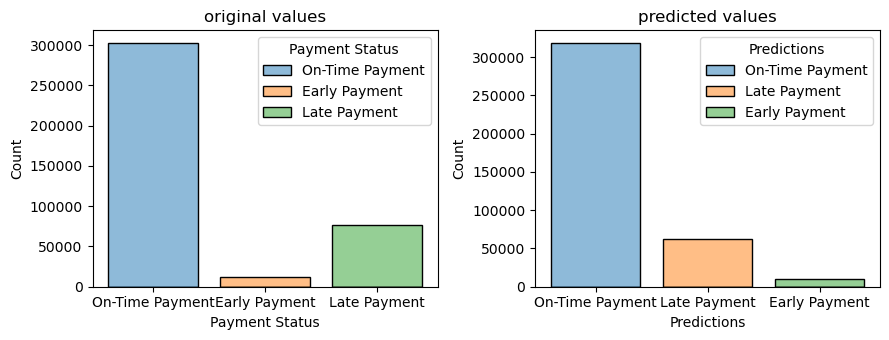

In [354]:
plt.rcParams["figure.figsize"] = [9.00, 3.50]
plt.rcParams["figure.autolayout"] = True



plt.subplot(1,2,1)
sns.histplot(Y_test,x='Payment Status',shrink = 0.8,hue ='Payment Status')
plt.title('original values')

plt.subplot(1,2,2)
sns.histplot(pred,x='Predictions',shrink = 0.8,hue ='Predictions')
plt.title('predicted values')

In [357]:
Y_test.value_counts()

Payment Status 
On-Time Payment    303129
Late Payment        76358
Early Payment       12316
dtype: int64

In [358]:
pred.value_counts()

Predictions    
On-Time Payment    318918
Late Payment        62709
Early Payment       10176
dtype: int64

In [370]:
final_df = pd.merge(X_test,Y_test,left_index= True, right_index=True)

In [372]:
final_df.reset_index()

,index,Vendor Number,Document Count,Amount,Clearing_Date_New,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y,Payment Status
0,876400,6062689.0,0.067882,1.194944e-06,0.216176,0.001599,0.150740,0.847661,0.139163,0.046154,0.000000,On-Time Payment
1,1014191,6096506.0,0.027663,5.524622e-09,0.305882,0.005395,0.167729,0.826876,0.139163,0.050000,0.000000,On-Time Payment
2,636137,6015437.0,0.030201,2.287102e-06,0.082353,0.001797,0.034142,0.964061,0.137262,0.048077,0.000000,On-Time Payment
3,438295,200244.0,0.066728,1.099969e-06,0.052941,0.092739,0.652227,0.255034,0.141445,0.038462,0.000000,On-Time Payment
4,160103,113619.0,0.002321,1.317515e-08,0.110294,0.011628,0.005814,0.982558,0.137643,0.038462,0.004630,On-Time Payment
...,...,...,...,...,...,...,...,...,...,...,...,...
391798,564227,2009683.0,0.003339,1.531845e-04,0.686765,0.000000,0.263158,0.736842,0.138783,0.007692,0.003086,On-Time Payment
391799,1042672,6104615.0,0.026279,4.294824e-08,0.651471,0.018069,0.059370,0.922561,0.137643,0.021154,0.000000,On-Time Payment
391800,671825,6020819.0,0.014497,2.415652e-08,0.845588,0.000935,0.119738,0.879326,0.138783,0.055769,0.000000,On-Time Payment
391801,434451,200211.0,0.055462,1.569142e-04,0.289706,0.004649,0.842183,0.153169,0.145247,0.042308,0.000000,Late Payment


In [385]:
fin_df = pd.merge(final_df,pred,left_index= True, right_index=True)

In [386]:
fin_df

,Vendor Number,Document Count,Amount,Clearing_Date_New,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y,Payment Status,Predictions
160103,113619.0,0.002321,1.317515e-08,0.110294,0.011628,0.005814,0.982558,0.137643,0.038462,0.004630,On-Time Payment,On-Time Payment
219894,122035.0,0.029726,1.294817e-05,0.414706,0.004108,0.234140,0.761753,0.138783,0.015385,0.000000,On-Time Payment,On-Time Payment
31147,101024.0,0.002457,5.139654e-04,0.958824,0.016484,0.076923,0.906593,0.138783,0.023077,0.004630,On-Time Payment,On-Time Payment
215092,121374.0,0.000204,2.734314e-08,0.651471,0.062500,0.000000,0.937500,0.137262,0.003846,0.041667,On-Time Payment,On-Time Payment
14627,100584.0,0.036581,2.293296e-04,0.855882,0.280415,0.050074,0.669510,0.135741,0.038462,0.000000,On-Time Payment,On-Time Payment
...,...,...,...,...,...,...,...,...,...,...,...,...
344410,200173.0,0.611291,1.478973e-04,0.083824,0.009504,0.409539,0.580957,0.159696,0.059615,0.000000,On-Time Payment,On-Time Payment
389495,200190.0,0.095124,1.466364e-04,0.080882,0.040377,0.056927,0.902697,0.138783,0.003846,0.000000,Late Payment,On-Time Payment
181209,116741.0,0.053983,3.555901e-05,0.629412,0.114630,0.068627,0.816742,0.137262,0.011538,0.000000,On-Time Payment,On-Time Payment
232655,123092.0,0.048770,9.096702e-09,0.676471,0.000000,0.993322,0.006678,0.216730,0.053846,0.000000,Late Payment,On-Time Payment


In [387]:
FINAL_DF = pd.merge(fin_df,df_m['Clearing_Date_New'],left_index= True, right_index=True)

In [396]:
FINAL_DF['Clearing_Date']=pd.to_datetime(FINAL_DF['Clearing_Date_New_y'], format='%Y-%m-%d',errors = 'coerce')

In [401]:
FINAL_DF.drop(FINAL_DF[['Posting Date', 'Clearing Date','Clearing_Date_New_y','Clearing_Date_New_x']],axis=1,inplace = True)

In [402]:
FINAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137224 entries, 160103 to 228063
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Vendor Number       137224 non-null  object        
 1   Document Count      137224 non-null  float64       
 2   Amount              137224 non-null  float64       
 3   Early Payment       137224 non-null  float64       
 4   Late Payment        137224 non-null  float64       
 5   On-Time Payment     137224 non-null  float64       
 6   Date_diff_y         137224 non-null  float64       
 7   outstanding days_y  137224 non-null  float64       
 8   Avg Gap_y           137224 non-null  float64       
 9   Payment Status      137224 non-null  object        
 10  Predictions         137224 non-null  object        
 11  Clearing_Date       137224 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 17.6+ MB


In [409]:
FINAL_DF[FINAL_DF['Clearing_Date'] > pd.to_datetime('23-10-2023')]

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\3834677634.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FINAL_DF[FINAL_DF['Clearing_Date'] > pd.to_datetime('23-10-2023')]


,Vendor Number,Document Count,Amount,Early Payment,Late Payment,On-Time Payment,Date_diff_y,outstanding days_y,Avg Gap_y,Payment Status,Predictions,Clearing_Date
208983,119696.0,0.001819,0.000019,0.0,0.007407,0.992593,0.137643,0.005769,0.006173,On-Time Payment,On-Time Payment,2023-10-24


In [410]:
FINAL_df = FINAL_DF[['Vendor Number','Clearing_Date','Payment Status','Predictions']]

In [414]:
FINAL_df[FINAL_df['Clearing_Date'] > pd.to_datetime('23-10-2023')]

C:\Users\LW832PA\AppData\Local\Temp\ipykernel_9132\3229471994.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FINAL_df[FINAL_df['Clearing_Date'] > pd.to_datetime('23-10-2023')]


,Vendor Number,Clearing_Date,Payment Status,Predictions
208983,119696.0,2023-10-24,On-Time Payment,On-Time Payment
